In [ ]:
import geopandas as gp
import pandas as pd
from shapely.geometry import Point
from geopandas.tools import sjoin

In [3]:
%matplotlib inline
import pylab as plt

In [30]:
pr = gp.read_file('../data/precincts.json').to_crs(epsg=2263)

In [31]:
pr.crs

{'init': 'epsg:2263', 'no_defs': True}

In [32]:
pr1 = pr.copy()
pr1['geometry'] = pr1['geometry'].centroid

In [33]:
pr1['X Center'] = pr1.geometry.apply(lambda p: p.x)
pr1['Y Center'] = pr1.geometry.apply(lambda p: p.y)

In [34]:
pr1.rename(columns={'precinct':'Precinct'},inplace=1)

In [35]:
pr1[['Precinct','X Center','Y Center']].to_csv('../data/precincts_centroids.csv', index=False)

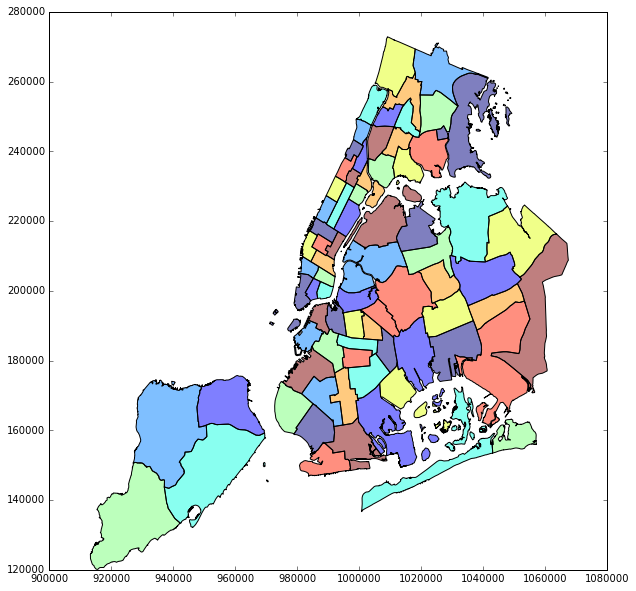

In [36]:
fig, ax = plt.subplots(figsize=(10,10))
pr.plot(ax=ax)
#pr1.plot(ax=ax)

In [41]:
X, Y = pd.np.mgrid[913175.11:1067382.51:200j, 120121.88:272844.29:200j]

In [42]:
X.shape

(200, 200)

In [43]:
GRID = pd.DataFrame({'X':X.ravel(),'Y':Y.ravel()})

In [45]:
GRID.head(5)

,X,Y
0,913175.11,120121.880000
1,913175.11,120889.329296
2,913175.11,121656.778593
3,913175.11,122424.227889
4,913175.11,123191.677186


In [69]:
def toGDF(data, lat='lat', lon='lon', crs=4326):
    crs =  {'init': 'epsg:{0}'.format(crs), 'no_defs': True}
    geometry = [Point(xy) for xy in zip(data[lon], data[lat])]
    return gp.GeoDataFrame(data, crs=crs, geometry=geometry)

GRID2 = toGDF(GRID, lat='Y',lon='X', crs=2263)

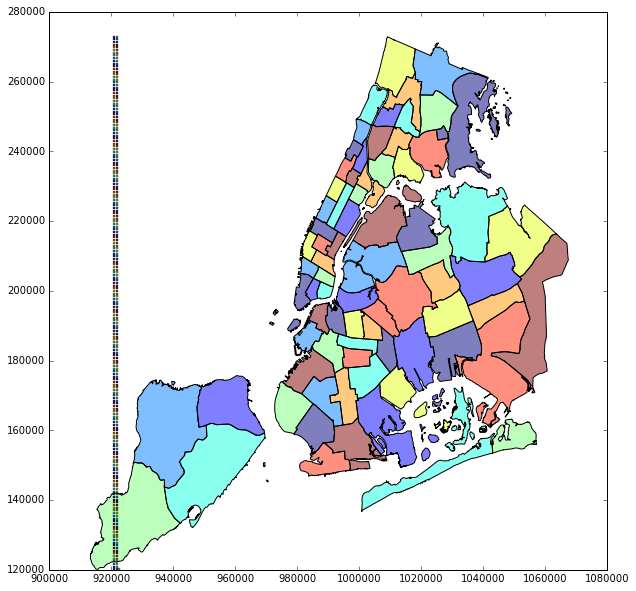

In [61]:
fig, ax = plt.subplots(figsize=(10,10))

GRID2.ix[2000:2400,:].plot(ax=ax)
pr.plot(ax=ax)

In [64]:
GRID3 = sjoin(GRID2, pr, how="left", op='within')

In [66]:
GRID3.drop(['index_right','shape_area','shape_leng'],1, inplace=1)

In [68]:
GRID3.to_csv('precinct_grid.csv')